<a href="https://colab.research.google.com/github/Gulwalishah/Piece-Wide-Codes/blob/main/Code_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Histogram and rational function**

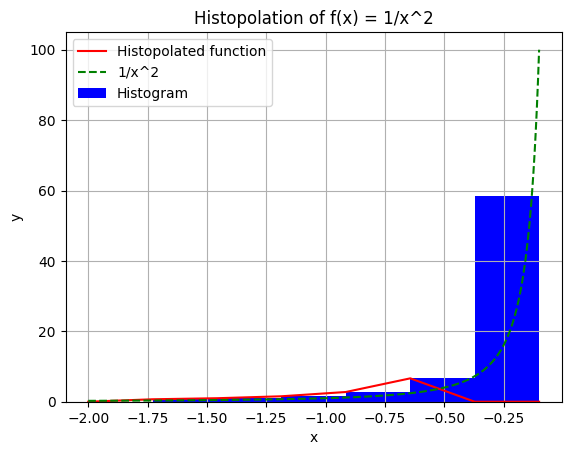

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of intervals (n) and interval boundaries
n = 8
a = -2
b = -0.1

# Generate uniform grid points
x = np.linspace(a, b, n)

# Compute the central spline knots
xi = (x[:-1] + x[1:]) / 2

# Define the function f(x) = 1/x^2
def f(x):
    return 1 / (x**2)

# Compute histogram heights z_i
h = x[1] - x[0]  # Interval width
z = [(1 / h) * np.trapz(f(x[i-1:i+2]), x[i-1:i+2]) for i in range(n-1)]  # Adjust the loop limits

# Histopolate the function
def histopolate(x, z, a, b):
    S = np.zeros(x.shape)

    for i in range(1, len(x) - 1):  # Adjust the loop limits
        m = (z[i] - z[i-1]) / (x[i] - x[i-1])
        b_i = z[i] - m * x[i]

        interval_mask = (x >= x[i-1]) & (x < x[i])

        x_values_in_interval = x[interval_mask]
        y_values_in_interval = 1 / (x_values_in_interval**2)

        S[interval_mask] = m * x_values_in_interval + b_i

    return S

S = histopolate(x, z, a, b)

# Create a bar chart for the original histogram in blue
plt.bar(xi, z, width=h, align='center', label='Histogram', color='blue')

# Plot the histopolated function in red
plt.plot(x, S, '-', label='Histopolated function', color='red')

# Calculate and plot 1/x^2 in green
x_values_for_1_over_x2 = np.linspace(a, b, 400)  # Generate x values for 1/x^2
y_values_for_1_over_x2 = 1 / (x_values_for_1_over_x2**2)  # Calculate 1/x^2

plt.plot(x_values_for_1_over_x2, y_values_for_1_over_x2, '--', label='1/x^2', color='green')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Histopolation of f(x) = 1/x^2')
plt.grid(True)
plt.show()
